# Limpieza de datos y feature engineering

A continuación vamos a realizar una pequeña limpieza de datos y comenzaremos a definir los features que formaran parte de nuestro entrenamiento.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
df = pd.read_csv('../data/raw/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Selecting features

#### Estandarizamos las columnas a los tipos de datos que le corresponde

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df = df.set_index('id')

In [5]:
df.price = df.price.astype(int)

In [6]:
df.bathrooms = df.bathrooms.astype(int)

In [7]:
df.floors = df.floors.astype(int)

In [8]:
df.dtypes

date             datetime64[ns]
price                     int32
bedrooms                  int64
bathrooms                 int32
sqft_living               int64
sqft_lot                  int64
floors                    int32
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

#### Creamos algunos features a partir de los existentes 

In [9]:
df["house_age"] = df["date"].dt.year - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,59,0
6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,1
5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,82,0
2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,49,0
1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,28,0


In [10]:
df.drop(columns=['date','yr_renovated'], inplace=True)

#### Duplicados 

In [11]:
print('Cantidad de observaciones antes de eliminar duplicados: {}.'.format(df.shape[0]))

Cantidad de observaciones antes de eliminar duplicados: 21613.


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print('Cantidad de observaciones luego de eliminar duplicados: {}.'.format(df.shape[0]))

Cantidad de observaciones luego de eliminar duplicados: 21609.


#### Features que no son relevantes
Para esto vamos a utilizar los 9 features que mas correlacionado esté a nuestra variable independiente.

In [14]:
l = len(df.columns)
correlation = df.corr(method='pearson')
columns = correlation.nlargest(l, 'price').index
columns

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'zipcode', 'house_age'],
      dtype='object')

In [15]:
df = df[columns]
df.head()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,renovated,sqft_lot,sqft_lot15,yr_built,condition,long,zipcode,house_age
id,,,,,,,,,,,,,,,,,,,,
7129300520,221900,1180,7,1180,1340,1,0,0,3,47.5112,0,1,0,5650,5650,1955,3,-122.257,98178,59
6414100192,538000,2570,7,2170,1690,2,0,400,3,47.7210,0,2,1,7242,7639,1951,3,-122.319,98125,63
5631500400,180000,770,6,770,2720,1,0,0,2,47.7379,0,1,0,10000,8062,1933,3,-122.233,98028,82
2487200875,604000,1960,7,1050,1360,3,0,910,4,47.5208,0,1,0,5000,5000,1965,5,-122.393,98136,49
1954400510,510000,1680,8,1680,1800,2,0,0,3,47.6168,0,1,0,8080,7503,1987,3,-122.045,98074,28


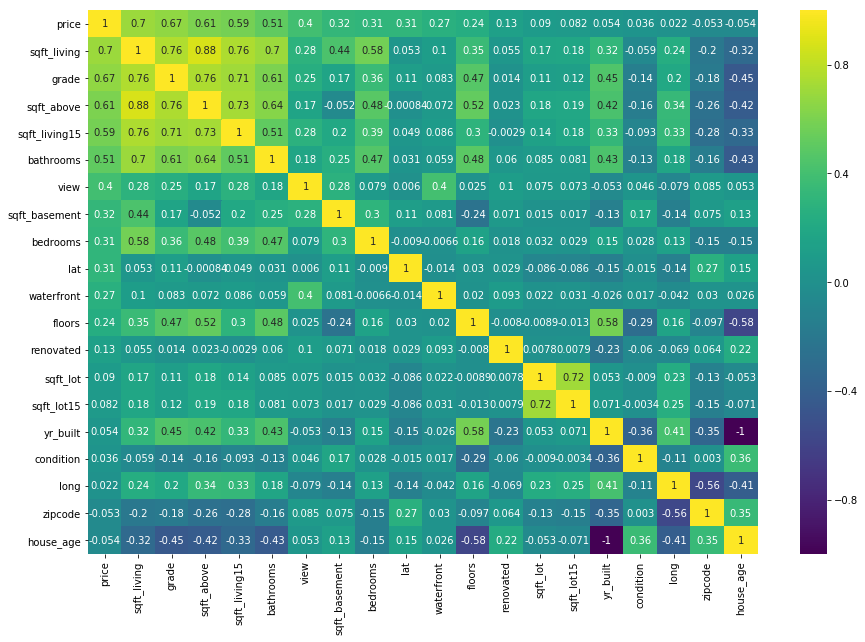

In [16]:
cm = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

####  Outliers

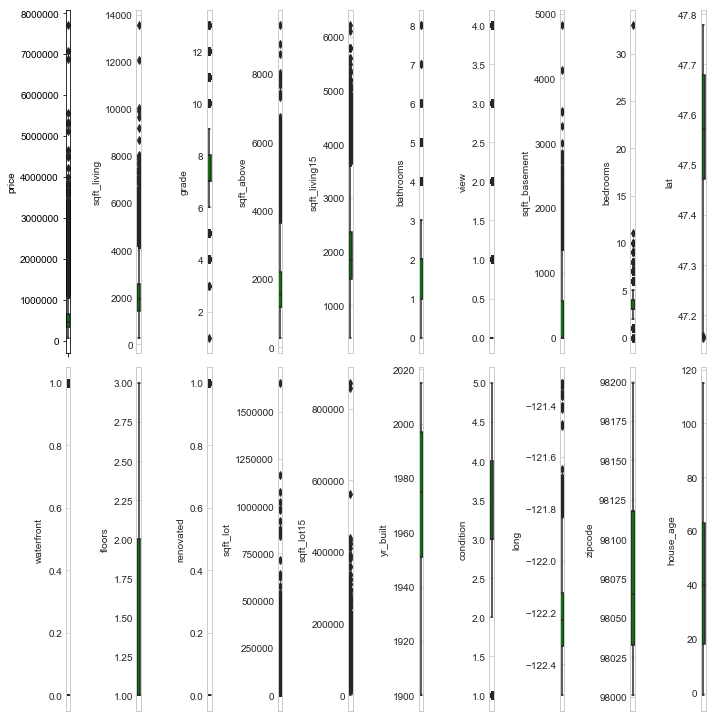

In [17]:
l = df.columns.values
number_of_columns=10
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

## Save dataset 

In [18]:
pd.DataFrame.to_csv(df, '../data/processed/kc_house_data_clean_with_outliers.csv', index_label=False)

In [19]:
#pd.DataFrame.to_csv(, '../data/processed/kc_house_data_clean_without_outliers', index_label=False)